<a href="https://colab.research.google.com/github/AcSsalazar/Proyecto_1_udem/blob/main/MP_Consumos_BarbosaV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Control inventario de materias primas con apoyo de la ciencia de datos
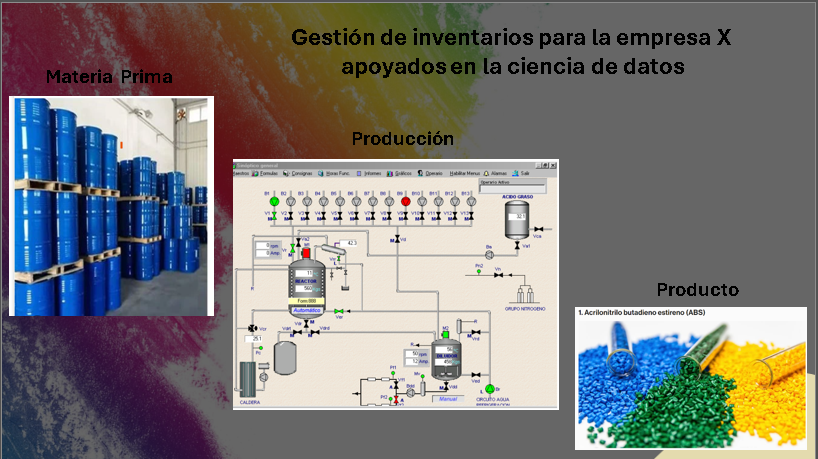
La empresa X, desde hace 10 años, se dedica a la fabricación de productos para la construcción como: resinas acrílicas, pinturas industriales, recubrimientos para madera, entre otros; y lo hacen procesando las siguientes materias primas: Soda, Xilol, Toluol, 2EHA, Vam, Butil, Ethil, Metil y Estireno. Para la empresa la precisión en el control de inventarios sobre estos insumos es esencial, ya que las materias primas son costosas y altamente sensibles a las condiciones de almacenamiento. La empresa ha experimentado inconsistencias en estos inventarios, afectando la eficiencia de la producción y su estado financiero.

Es claro que actualmente, la empresa enfrenta problemas de gestión de inventario. A pesar de contar con un sistema automático de control de materiales, existen diferencias significativas entre el inventario registrado en almacén y el consumo reportado en producción, lo que ha generado pérdidas financieras y operativas como: (tiempo del recurso humano, costos por almacenamiento, costo logístico y por desabastecimiento). La falta de un sistema de monitoreo en tiempo real y métodos adecuados para prever la demanda ha llevado a frecuentes desajustes. Estos desajustes pueden deberse a errores en el registro de los datos de entrada (SP) en el controlador de los reactores manipulado por parte de los operarios, solo cuándo la producción está en modo semiautomático o también se dan por problemas en la trazabilidad de los lotes de las materias primas. Esto ha generado tiempos de espera en producción, altos costos de almacenamiento para materias primas que no se usan de inmediato y está impactando la rentabilidad y la competitividad de la empresa.


Este proyecto se enfocará en el diseño e implementación de un sistema de control de inventarios que permita la planificación eficiente de las materias primas. Para ello, se cuenta con una base de datos en tiempo real, con información de recetas y adiciones manuales que realizan los operarios en modo semiautomático para la producción.
El objetivo del proyecto será analizar estos datos para encontrar:
Patrones de consumo para encontrar inconsistencias.
Identificar las causas de las variaciones que hay en los inventarios y los reportes de producción.
Desarrollar un modelo predictivo para optimizar la gestión de inventarios, alineando el inventario disponible del almacén con la demanda real de la producción.
Causas y efectos
Las causas del problema incluyen la falta de un sistema de monitoreo continuo, prácticas de compra sin planeación y una previsión de demanda insuficiente. Los efectos de estos problemas se manifiestan en mayores costos, tiempos de producción detenidos y afectación de la rentabilidad de la empresa.

**Variables**

Se deben analizar las variables numericas:
 - Set Point(Solicitudes de materias primas en kg, se abrevia generalmente como SP)
 - Consumo (La metrica del consumo de los sensores de flujo másico, se abrevia como PV)

Se deben analizar variables categoricas como:
 - Solicitudes, partidas o lotes
 - Equipos(los cuales hacen referencia a reactores, tanques o diluidores)
 - Tipo de Solicitud(Receta o semiautomatico)

Se analizan en tiempo ya que son variables que se almacenan en funcion del tiempo
 - TimeStamp

 **Materias Primas**
1. Soda
2. Xilo
3. Toluol
4. 2EHA
5. Vam
6. Butil
7. Ethil
8. Metil
9. Estireno

# 2. Cargando Librerias y el conjunto de datos

*2.1. Carga de Librerias*

In [85]:
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
from pandas.plotting import scatter_matrix
import statsmodels.api as sm

*2.2. Carga de datos*

Se realiza carga de Datos por medio de parametro de la materia prima, esta materia prima esta en una hoja del libro de Excel. La función devuelve el DataFrame sample_df con los datos procesados, listo para análisis adicionales.

In [123]:
#2.2
archivo_excel = 'Data.xlsx'
hojas = pd.ExcelFile(archivo_excel).sheet_names


def DataMp(materiaPrima):
    sample_df = pd.read_excel(archivo_excel, sheet_name=materiaPrima,decimal='.', header=0, usecols="C:AO", skiprows=2)
    sample_df['TimeStamp'] = pd.to_datetime(sample_df['TimeStamp'])
    sample_df.set_index('TimeStamp', inplace=True)
    sample_df = sample_df.rename(columns={col: col +' ' +materiaPrima for col in sample_df.columns})
    return sample_df




Se genere el Data Frame por cada materia prima, invocando la funcion DataMp descrita anteriormente

In [127]:
sample_dfSoda=DataMp("Soda")
sample_dfXilol=DataMp("Xilol")
sample_dfToluol=DataMp("Toluol")
sample_df2EHA=DataMp("2EHA")
sample_dfVAM=DataMp("Vam")
sample_dfButil=DataMp("Butil")
sample_dfEthil=DataMp("Ethil")
sample_dfMetil=DataMp("Metil")
sample_dfEstireno=DataMp("Estireno")
sample_dfSoda


,Partida R131 Soda,Estado Bombeo Semi R131 Soda,SP Semi R131 Soda,Estado Bombeo Receta R131 Soda,SP Receta R131 Soda,Consumo R131 Soda,Partida TK131 Soda,Estado Bombeo Semi TK131 Soda,SP Semi TK131 Soda,Consumo TK131 Soda,...,SP Semi R221 Soda,Estado Bombeo Receta R221 Soda,SP Receta R221 Soda,Consumo R221 Soda,Partida TK221 Soda,Estado Bombeo Semi TK221 Soda,SP Semi TK221 Soda,Estado Bombeo Receta TK221 Soda,SP Receta TK221 Soda,Consumo TK221 Soda
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2024-10-22 16:40:29.032,10126959,Inactive,194.916870,Inactive,1096.303711,1287.890869,12345678,Active,638.449890,1788.473145,...,600,No Data,0,1959.967773,12345678,Inactive,223.772156,Inactive,0,2314.985596
2024-10-22 16:41:29.032,10126959,Inactive,194.898575,Inactive,1096.270264,1287.890869,12345678,Active,638.238098,1804.062256,...,600,No Data,0,1959.967773,12345678,Inactive,223.886414,Inactive,0,2314.985596
2024-10-22 16:42:29.032,10126959,Inactive,194.880264,Inactive,1096.236938,1287.890869,12345678,Active,638.026306,1819.701782,...,600,No Data,0,1959.967773,12345678,Inactive,224.000687,Inactive,0,2314.985596
2024-10-22 16:43:29.032,10126959,Inactive,194.861969,Inactive,1096.203613,1287.890869,12345678,Active,637.814453,1835.358887,...,600,No Data,0,1959.967773,12345678,Inactive,224.11496,Inactive,0,2314.985596
2024-10-22 16:44:29.032,10126959,Inactive,194.843674,Inactive,1096.170288,1287.890869,12345678,Active,637.602661,1850.113892,...,600,No Data,0,1959.967773,12345678,Inactive,224.229218,Inactive,0,2314.985596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-29 16:36:29.032,10127420,Inactive,12.000000,Inactive,793.000000,793.013672,10127430,Inactive,1030.000000,1029.105591,...,600,Inactive,0,1959.967773,12345678,Inactive,295,Inactive,0,295.028961
2024-10-29 16:37:29.032,10127420,Inactive,12.000000,Inactive,793.000000,793.013672,10127430,Inactive,1030.000000,1029.105591,...,600,Inactive,0,1959.967773,12345678,Inactive,295,Inactive,0,295.028961
2024-10-29 16:38:29.032,10127420,Inactive,12.000000,Inactive,793.000000,793.013672,10127430,Inactive,1030.000000,1029.105591,...,600,Inactive,0,1959.967773,12345678,Inactive,295,Inactive,0,295.028961


In [130]:
MpGlobal= pd.concat([sample_dfSoda,
                     sample_dfXilol,
                     sample_dfToluol,
                     sample_df2EHA,
                     sample_dfVAM,
                     sample_dfButil,
                     sample_dfEthil,
                     sample_dfMetil,
                     sample_dfEstireno
                     ],axis=1)
MpGlobal

,Partida R131 Soda,Estado Bombeo Semi R131 Soda,SP Semi R131 Soda,Estado Bombeo Receta R131 Soda,SP Receta R131 Soda,Consumo R131 Soda,Partida TK131 Soda,Estado Bombeo Semi TK131 Soda,SP Semi TK131 Soda,Consumo TK131 Soda,...,SP Receta V221 Estireno,Consumo V221 Estireno,Partida V241 Estireno,Estado Bombeo Semi V241 Estireno,SP Semi V241 Estireno,Estado Bombeo Receta V241 Estireno,SP Receta V241 Estireno,Consumo V241 Estireno,Unnamed: 39 Estireno,Fin Estireno
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2024-10-22 16:40:29.032,10126959,Inactive,194.916870,Inactive,1096.303711,1287.890869,12345678,Active,638.449890,1788.473145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-22 16:41:29.032,10126959,Inactive,194.898575,Inactive,1096.270264,1287.890869,12345678,Active,638.238098,1804.062256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-22 16:42:29.032,10126959,Inactive,194.880264,Inactive,1096.236938,1287.890869,12345678,Active,638.026306,1819.701782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-22 16:43:29.032,10126959,Inactive,194.861969,Inactive,1096.203613,1287.890869,12345678,Active,637.814453,1835.358887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-22 16:44:29.032,10126959,Inactive,194.843674,Inactive,1096.170288,1287.890869,12345678,Active,637.602661,1850.113892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-29 16:40:27.131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-29 16:40:27.768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-29 16:40:27.862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Analisis de Datos Exploratorios

*3.1. Estadística descriptiva*

EDA de Soda

In [153]:
# MpGlobal.describe()
pd.set_option('display.max_columns', None)

MpGlobalDrop = MpGlobal.select_dtypes(include=['number'])
MpGlobalDrop = MpGlobalDrop.loc[:, (MpGlobalDrop != 0.0).any(axis=0)]
MpGlobalDrop = MpGlobalDrop.loc[:, MpGlobalDrop.nunique() > 1]
MpGlobalDrop = MpGlobalDrop.dropna(axis=1, how='all')

# MpGlobalDrop=MpGlobalDrop.drop(columns=['SP Receta R141 Soda','Consumo R141 Soda','SP Receta V142 Soda','Consumo V142 Soda','SP Semi TK141 Soda','Consumo TK141 Soda','Partida R221 Soda','SP Receta R111 Xilol','Consumo R111 Xilol','SP Semi V221 Estireno','SP Receta V221 Estireno','SP Semi V131 Estireno','SP Receta V131 Estireno','Consumo V131 Estireno','SP Semi V241 Estireno','SP Receta V241 Estireno','SP Semi D122 Estireno','SP Receta D122 Estireno','SP Receta V115 Estireno','Consumo D122 Estireno','SP Semi R221 Xilol','SP Receta R221 Xilol','Consumo R221 Xilol','Consumo V221 Xilol','Partida TK221 Xilol','Partida R221 Xilol'])
MpGlobalDrop.describe()


,SP Semi R131 Soda,SP Receta R131 Soda,Consumo R131 Soda,SP Semi TK131 Soda,Consumo TK131 Soda,SP Semi R141 Soda,SP Semi V142 Soda,SP Semi R111 Xilol,Consumo R111 Xilol,SP Semi V115 Xilol,SP Receta V115 Xilol,Consumo V115 Xilol,SP Semi TK112 Xilol,Consumo TK112 Xilol,SP Semi V115 Toluol,Consumo V115 Toluol,SP Semi R221 Toluol,SP Receta R221 Toluol,Consumo R221 Toluol,SP Receta V221 Toluol,Consumo V221 Toluol,SP Semi TK221 Toluol,Consumo TK221 Toluol,SP Semi V131 2EHA,Consumo V131 2EHA,SP Receta V141 2EHA,Consumo V141 2EHA,SP Semi D122 Vam,Consumo V131 Vam,Consumo V141 Vam,SP Receta V241 Vam,Consumo V115 Butil,Consumo V141 Butil,Consumo V241 Butil,Consumo V115 Metil,SP Receta V141 Metil,Consumo V141 Metil,SP Receta V221 Metil,Consumo V221 Metil,SP Semi V115 Estireno,Consumo V115 Estireno,SP Semi V141 Estireno,SP Receta V141 Estireno,Consumo V141 Estireno
count,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000
mean,102.696824,929.790369,1197.199277,518.716366,406.371745,941.646807,293.172488,153.231250,181.241238,16.496029,177.552617,65.551486,3.869727,6.807178,18.622037,11.312267,311.363838,483.695041,980.426593,17.343544,57.662315,44.816477,269.906932,1.441204,11.570785,2422.372047,3122.196723,1.434211,11.570785,3122.196723,4458.416905,244.501097,2561.657012,2254.365177,645.047154,526.603551,703.800231,286.742468,1128.440979,95.834465,481.298728,8.970624,2110.594787,2182.404130
std,53.243840,94.605240,236.791434,206.518551,508.254669,534.477462,174.003813,98.844222,201.097250,8.456630,23.798720,56.889074,0.819871,4.932864,10.000138,8.304432,345.362272,610.815484,789.482522,20.269838,2.884938,108.964833,476.093453,0.692303,14.617935,91.887248,983.359502,1.031267,14.617935,983.359502,2.163019,5.352030,118.352549,231.673967,20.423227,22.933094,236.054990,355.537647,57.845285,67.029802,194.634020,0.704185,17.454136,198.568655
min,12.000000,793.000000,0.000371,13.865457,0.000000,30.000000,5.000000,5.000000,0.004243,5.000000,129.014313,0.000000,2.413345,0.000840,5.000000,-0.000044,0.022912,0.000000,0.000028,0.000000,10.161987,0.000000,49.928326,1.000000,0.000000,2363.750000,-0.196289,0.000000,0.000000,-0.196289,4453.196289,34.896484,42.594971,2.501000,5.030728,511.839996,14.330078,0.000000,0.000000,5.000000,0.274424,7.734031,2099.570068,50.643066
25%,56.577095,844.109070,1287.872681,364.549408,10.023966,478.708038,142.115051,55.647015,22.107874,8.542638,157.512726,14.555838,3.153335,2.215633,9.230727,3.513494,16.953230,0.000000,305.009888,0.000000,57.990356,0.000000,49.928326,1.000000,0.000000,2363.750000,2370.021484,0.479270,0.000000,2370.021484,4456.853027,244.702148,2569.650635,2287.529297,646.178467,511.839996,517.032227,0.000000,1132.607178,32.649296,579.552307,8.357563,2099.570068,2104.243652
50%,102.690353,928.173950,1287.890991,616.836304,330.017334,941.591858,293.014435,169.738953,120.051346,16.217321,194.000000,52.420513,3.893324,6.666423,18.298754,11.043835,19.657553,178.669205,729.366638,5.625936,57.990356,0.000000,49.928326,1.000000,0.000000,2363.750000,2370.021484,1.407041,0.000000,2370.021484,4460.000000,244.702148,2569.650635,2290.432129,646.178467,511.839996,517.032227,81.809807,1132.607178,93.559181,579.552307,8.981096,2099.570068,2107.384277
75%,148.803604,1012.238831,1287.890991,653.761353,655.009888,1404.475586,443.913788,253.723297,246.544052,23.892004,194.000000,109.362244,4.633314,11.117213,27.366781,18.574175,730.000000,825.499573,2047.555664,36.258892,58.842285,0.000000,49.928326,1.803540,30.031921,2470.651855,4351.190430,2.334812,

*3.2. Visualización de datos*



Veamos la distribución de los datos durante todo el período.

Se crea funcion para mostrar el histograma de cada materia prima, se pone como parametro df que es el data frame de cada materia prima

array([[<Axes: title={'center': 'SP Semi R131 Soda'}>,
        <Axes: title={'center': 'SP Receta R131 Soda'}>,
        <Axes: title={'center': 'Consumo R131 Soda'}>,
        <Axes: title={'center': 'SP Semi TK131 Soda'}>,
        <Axes: title={'center': 'Consumo TK131 Soda'}>,
        <Axes: title={'center': 'SP Semi R141 Soda'}>,
        <Axes: title={'center': 'SP Semi V142 Soda'}>],
       [<Axes: title={'center': 'SP Semi R111 Xilol'}>,
        <Axes: title={'center': 'Consumo R111 Xilol'}>,
        <Axes: title={'center': 'SP Semi V115 Xilol'}>,
        <Axes: title={'center': 'SP Receta V115 Xilol'}>,
        <Axes: title={'center': 'Consumo V115 Xilol'}>,
        <Axes: title={'center': 'SP Semi TK112 Xilol'}>,
        <Axes: title={'center': 'Consumo TK112 Xilol'}>],
       [<Axes: title={'center': 'SP Semi V115 Toluol'}>,
        <Axes: title={'center': 'Consumo V115 Toluol'}>,
        <Axes: title={'center': 'SP Semi R221 Toluol'}>,
        <Axes: title={'center': 'SP Receta

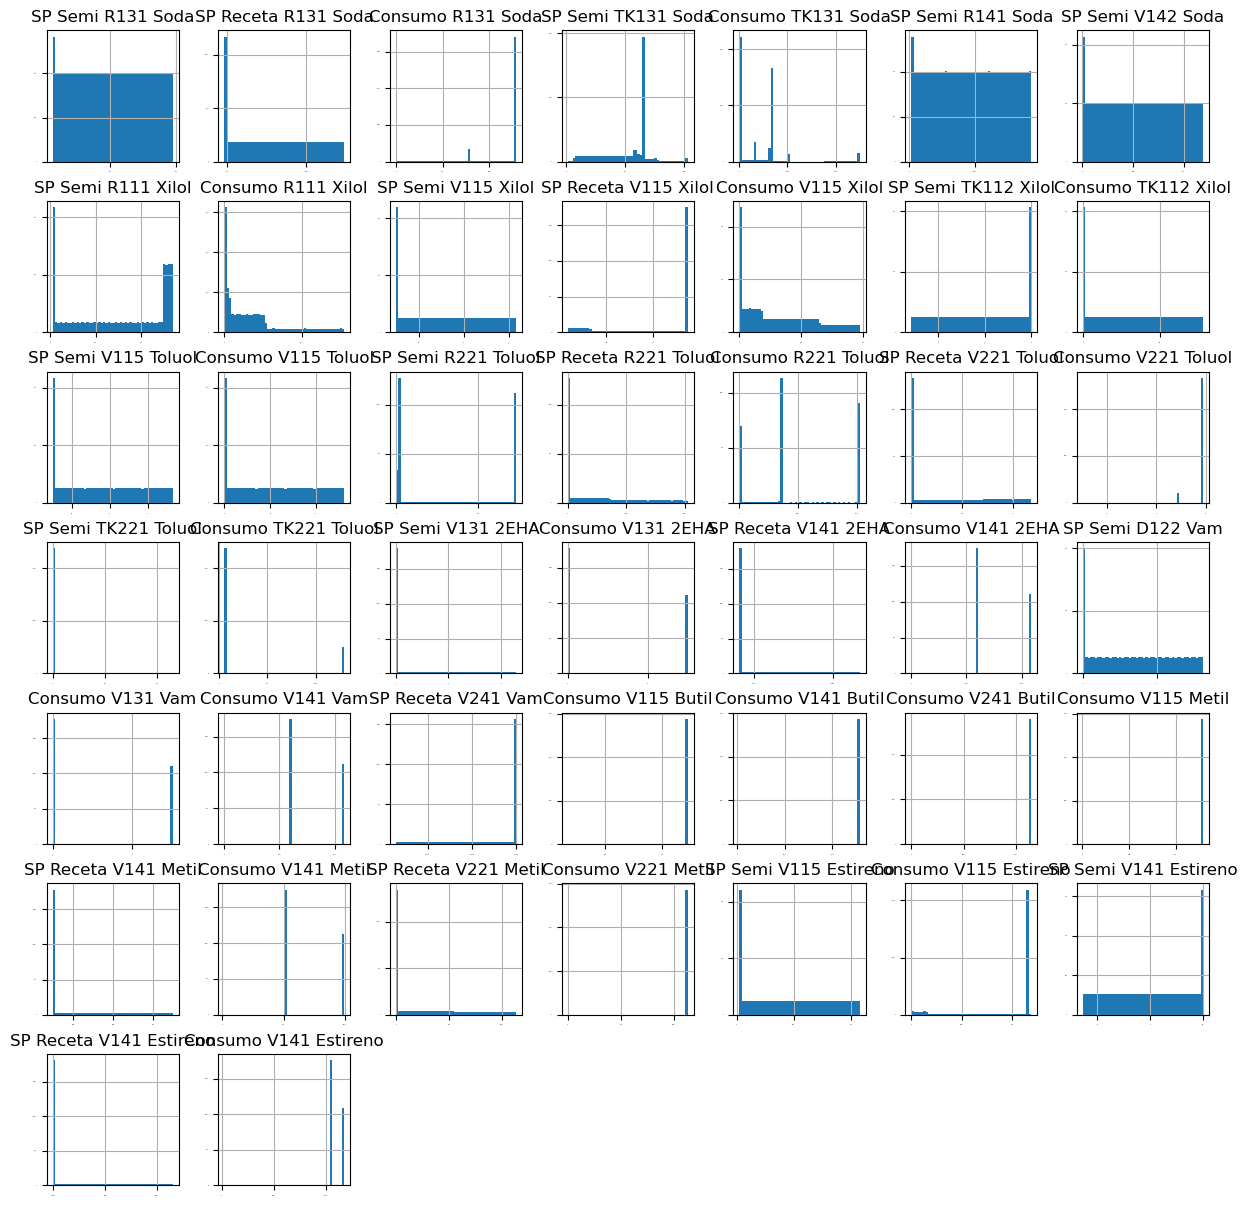

In [154]:
# def VisualizacionHis(df):
MpGlobalDrop.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(15,15))
    # pyplot.show()


En este histograma muestra la distribución de cada serie individualmente.

 Distribución de densidad en la misma escala del eje x.

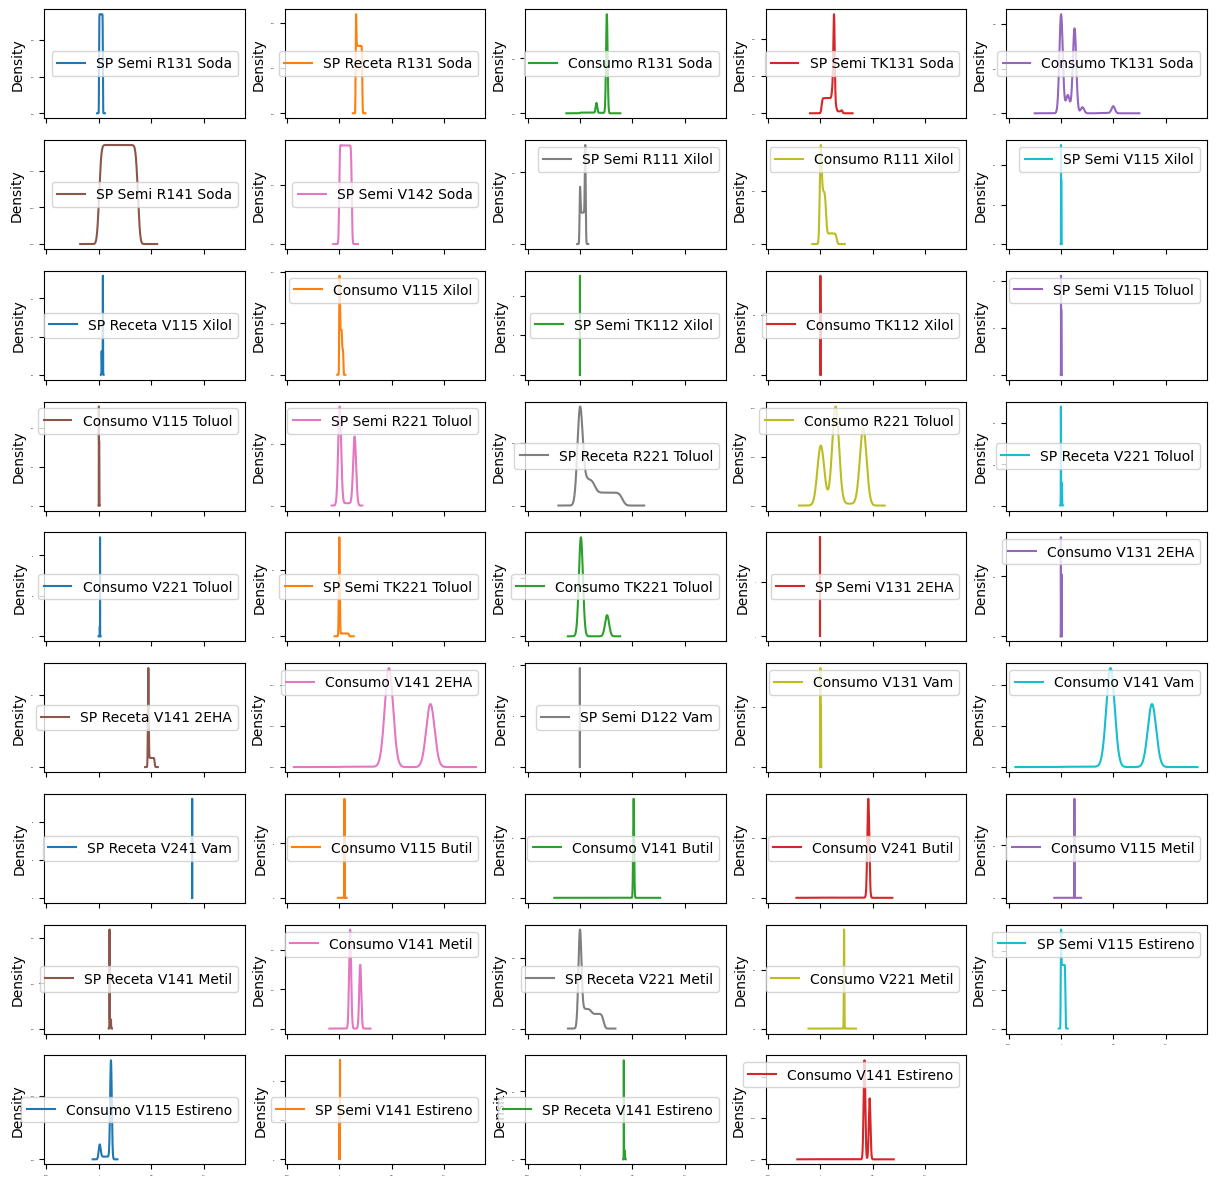

In [157]:
MpGlobalDrop.plot(kind='density', subplots=True, layout=(9,5), sharex=True, legend=True, fontsize=1, figsize=(15,15))
pyplot.show()

Para tener una idea de la interdependencia de los datos, observamos el diagrama de dispersión y la matriz de correlación.

<Axes: title={'center': 'Correlation Matrix'}>

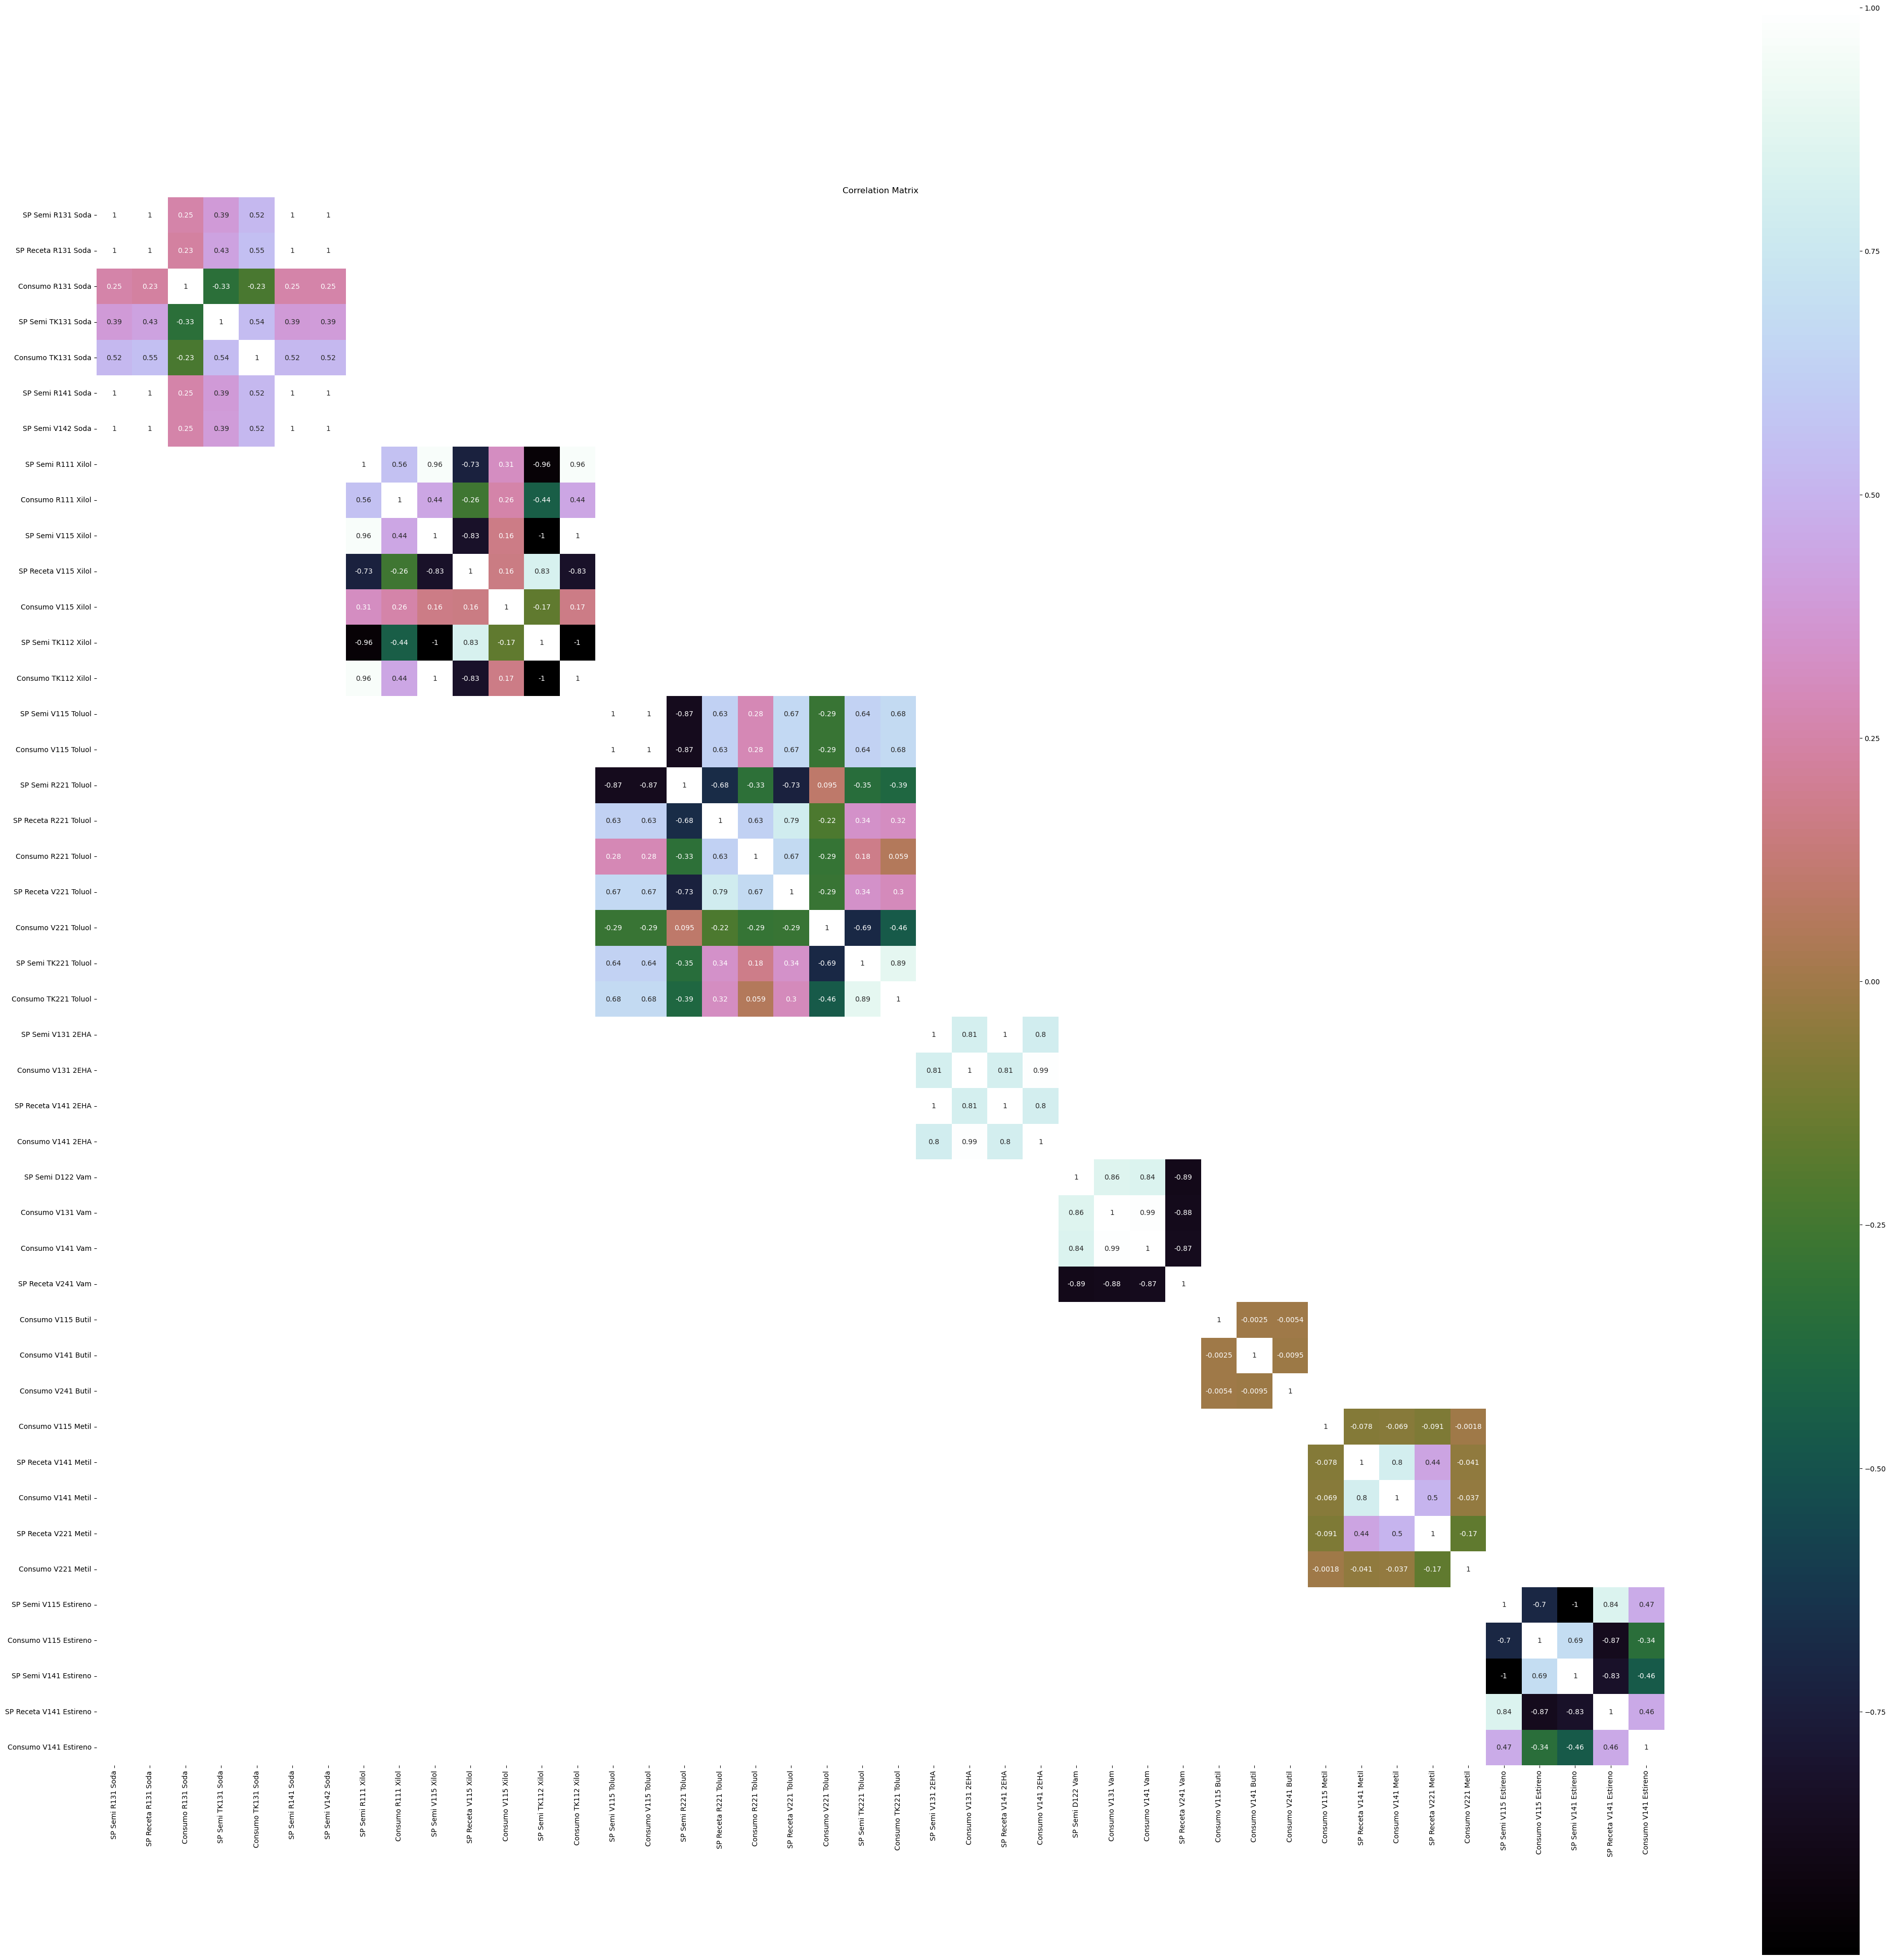

In [161]:
# def EdaCorr(df,mp):
MpGlobalDrop = MpGlobalDrop.drop(MpGlobalDrop.filter(regex='^Partida').columns, axis=1)
MpGlobalDrop = MpGlobalDrop.drop(MpGlobalDrop.filter(regex='^Estado').columns, axis=1)
MpGlobalDrop = MpGlobalDrop.replace('Bad Input', 0)
MpGlobalDrop = MpGlobalDrop.replace('Tag not found', 0)
correlation = MpGlobalDrop.corr()
pyplot.figure(figsize=(50,50))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [ ]:

MpGlobalDrop = MpGlobalDrop.drop(MpGlobalDrop.filter(regex='^Partida').columns, axis=1)
MpGlobalDrop = MpGlobalDrop.drop(MpGlobalDrop.filter(regex='^Estado').columns, axis=1)
MpGlobalDrop = MpGlobalDrop.replace('Bad Input', 0)
MpGlobalDrop = MpGlobalDrop.replace('Tag not found', 0)
pyplot.figure(figsize=(100,100))
scatter_matrix(MpGlobalDrop,figsize=(100,100))
pyplot.show()

*3.3 Analisis de la serie de tiempo*

# 4. Preparacion de Datos

In [73]:
def identificar_sp_activo(row, equipo):
    if 'Activo_Receta' + equipo in row:
        if row['Activo_Receta' + equipo]:
            return 'SP Receta ' + equipo
        elif row['Activo_Semi' + equipo]:
            return 'SP Semi ' + equipo
        else:
            return 'Ninguno'
    elif 'Activo_Semi' + equipo in row:
        if row['Activo_Semi' + equipo]:
            return 'SP Semi ' + equipo
    return 'Ninguno'



# Identificar si el bombeo está activo
def CalculoMP(equipo,sample_df):
    sample_df['Time_Stamp'] = sample_df.index
    sample_df['Activo_Semi' + equipo] = sample_df['Estado Bombeo Semi '+ equipo] == 'Active'

    if 'Estado Bombeo Receta ' + equipo in sample_df.columns:
        sample_df['Activo_Receta' + equipo] = sample_df['Estado Bombeo Receta '+ equipo] == 'Active'


    # Crear una columna que identifique el nuevo SP activo
    # Aplicar la función para identificar el SP activo en cada momento
    # sample_df['SP_Activo' + equipo] = sample_df.apply(identificar_sp_activo, axis=1)
    sample_df['SP_Activo' + equipo] = sample_df.apply(identificar_sp_activo, axis=1, args=(equipo,))


    # Crear una columna con el valor del SP activo en cada momento
    sample_df['Valor_SP_Activo'] = sample_df.apply(
        lambda row: row['SP Receta ' + equipo] if row['SP_Activo' + equipo] == 'SP Receta ' + equipo
        else (row['SP Semi ' + equipo] if row['SP_Activo' + equipo] == 'SP Semi ' + equipo else 0),
        axis=1
    )

    # Identificar cambios en el SP activo (cada vez que se activa uno nuevo)
    sample_df['Cambio_SP_Activo'] = sample_df['SP_Activo' + equipo].shift(1) != sample_df['SP_Activo' + equipo]
    sample_df['Consumo R131_1'] = sample_df['Consumo ' + equipo].shift(-1)

    # Crear un número de solicitud único para cada nuevo SP activo
    sample_df['Solicitud'] = sample_df['Cambio_SP_Activo'].cumsum()

    # Agrupar los sample_df por solicitud y obtener los valores finales de SP y PV
    resultadoR131 = sample_df[sample_df['SP_Activo' + equipo] != 'Ninguno'].groupby('Solicitud').agg(
        SP_Activo_Final=('SP_Activo' + equipo, 'last'),
        Valor_SP_Final=('Valor_SP_Activo', 'max'),  # Tomar el máximo de los valores de SP para cada carga
        PV_Final=('Consumo R131_1', 'last'),  # Tomar el último PV del grupo
        Time_Stamp=('Time_Stamp', 'last')
).reset_index()
    resultadoR131 = resultadoR131.set_index('Time_Stamp')
    resultadoR131["Equipo"]=equipo
    return resultadoR131
    # # Sumar todos los valores para cada carga y agregar un total
    # suma_filas = resultadoR131[['Valor_SP_Final', 'PV_Final']].sum().to_frame().T
    # suma_filas['SP_Activo_Final'] = 'Total ' + equipo
    # suma_filas['Solicitud'] = ' '

    # # Concatenar la fila de suma al DataFrame original
    # resultadoSoda_con_sumaR131Soda = pd.concat([resultadoSodaR131, suma_filas], ignore_index=True)
    # # resultadoSoda_con_sumaR131Soda=resultadoSoda

    # # Ordenar el resultadoSoda final para que sea más legible
    # resultado_con_sumaR131Soda = resultadoSod_con_sumaR131Soda[['Solicitud', 'SP_Activo_Final', 'Valor_SP_Final', 'PV_Final']]
    # resultado_con_sumaR131Soda["Equipo"]="R131"
    # # Verificar el resultado
    # return resultado_con_sumaR131Soda


4.1 Materia Prima Soda

In [64]:
sample_dfSoda.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10081 entries, 2024-10-22 16:40:29.032000 to 2024-10-29 16:40:29.032000
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Partida R131                10081 non-null  object 
 1   Estado Bombeo Semi R131     10081 non-null  object 
 2   SP Semi R131                10081 non-null  float64
 3   Estado Bombeo Receta R131   10081 non-null  object 
 4   SP Receta R131              10081 non-null  float64
 5   Consumo R131                10081 non-null  float64
 6   Partida TK131               10081 non-null  object 
 7   Estado Bombeo Semi TK131    10081 non-null  object 
 8   SP Semi TK131               10081 non-null  float64
 9   Consumo TK131               10081 non-null  float64
 10  Partida R141                10081 non-null  object 
 11  Estado Bombeo Semi R141     10081 non-null  object 
 12  SP Semi R141                10081 non-n

In [74]:
resultadoSodaR131=CalculoMP("R131",sample_dfSoda)
resultadoSodaTK131=CalculoMP("TK131",sample_dfSoda)
resultadoSodaR141=CalculoMP("TK141",sample_dfSoda)
resultadoSodaV142=CalculoMP("V142",sample_dfSoda)
resultadoSodaTk141=CalculoMP("TK141",sample_dfSoda)
resultadoSodaR221=CalculoMP("R221",sample_dfSoda)
resultadoSodaTK221=CalculoMP("TK221",sample_dfSoda)

resultadoSoda=pd.concat([resultadoSodaR131,
                      resultadoSodaTK131,
                      resultadoSodaR141,
                      resultadoSodaV142,
                      resultadoSodaTk141,
                      resultadoSodaR221,
                      resultadoSodaTK221])
resultadoSoda["PV_Final"]=pd.to_numeric(resultadoSoda["PV_Final"])
# resultadoSoda["Solicitud"]=resultadoSoda["Solicitud"].astype('category')
resultadoSoda

,Solicitud,SP_Activo_Final,Valor_SP_Final,PV_Final,Equipo
Time_Stamp,,,,,
2024-10-22 22:40:29.032,2,SP Receta R131,1086.929810,1287.476318,R131
2024-10-23 06:46:29.032,4,SP Receta R131,1070.750610,1287.889404,R131
2024-10-24 07:05:29.032,6,SP Receta R131,1022.079712,1287.872681,R131
2024-10-24 15:31:29.032,8,SP Receta R131,1005.200073,1287.883179,R131
2024-10-24 23:49:29.032,10,SP Receta R131,988.587219,1287.870483,R131
2024-10-25 08:41:29.032,12,SP Receta R131,970.806824,1287.890991,R131
2024-10-28 16:38:29.032,14,SP Receta R131,810.816711,1287.893677,R131
2024-10-29 01:23:29.032,16,SP Receta R131,793.000000,793.015930,R131
2024-10-29 10:45:29.032,18,SP Receta R131,793.000000,793.013672,R131


In [27]:
pivot_tableSoda = resultadoSoda.pivot_table(values=['Valor_SP_Final', 'PV_Final'], index=['Equipo','Solicitud','SP_Activo_Final'], aggfunc='sum', margins=True, margins_name='Total')
pivot_tableSoda["Diferencia"]=pivot_tableSoda["Valor_SP_Final"]-pivot_tableSoda["PV_Final"]
pivot_tableSoda

C:\Users\JeissonVelasquez\AppData\Local\Temp\ipykernel_21572\3376301475.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_tableSoda = resultadoSoda.pivot_table(values=['Valor_SP_Final', 'PV_Final'], index=['Equipo','Solicitud','SP_Activo_Final'], aggfunc='sum', margins=True, margins_name='Total')


PV_Final  Valor_SP_Final   Diferencia
Equipo Solicitud SP_Activo_Final                                           
R131   1         SP Receta R131       0.000000        0.000000     0.000000
                 SP Semi TK131        0.000000        0.000000     0.000000
                 SP Semi TK221        0.000000        0.000000     0.000000
       2         SP Receta R131    1287.476318     1086.929810  -200.546509
                 SP Semi TK131        0.000000        0.000000     0.000000
...                                        ...             ...          ...
TK221  21        SP Semi TK221        0.000000        0.000000     0.000000
       23        SP Receta R131       0.000000        0.000000     0.000000
                 SP Semi TK131        0.000000        0.000000     0.000000
                 SP Semi TK221        0.000000        0.000000     0.000000
Total                             19981.683176    16744.525696 -3237.157480

[190 rows x 3 columns]

4.2 Materia Prima Xilol

In [75]:
resultadoXilolR111=CalculoMP("R111",sample_dfXilol)
resultadoXilolV115=CalculoMP("V115",sample_dfXilol)
resultadoXilolTK112=CalculoMP("TK112",sample_dfXilol)
resultadoXilolR221=CalculoMP("R221",sample_dfXilol)
resultadoXilolV221=CalculoMP("V221",sample_dfXilol)
resultadoXilolTK221=CalculoMP("TK221",sample_dfXilol)


resultadoXilol=pd.concat([resultadoXilolR111,
                resultadoXilolV115,
                resultadoXilolTK112,
                resultadoXilolR221,
                resultadoXilolV221,
                resultadoXilolTK221
                ])
resultadoXilol["PV_Final"]=pd.to_numeric(resultadoXilol["PV_Final"])
resultadoXilol["Solicitud"]=resultadoXilol["Solicitud"].astype('category')
resultadoXilol

,Solicitud,SP_Activo_Final,Valor_SP_Final,PV_Final,Equipo
Time_Stamp,,,,,
2024-10-27 22:35:27.862,2,SP Receta R111,778.000000,776.382324,R111
2024-10-28 06:08:27.862,4,SP Semi R111,269.886322,268.822113,R111
2024-10-28 06:46:27.862,6,SP Receta R111,778.000000,776.831421,R111
2024-10-28 14:05:27.862,8,SP Semi R111,194.458862,269.851288,R111
2024-10-27 23:12:27.862,2,SP Receta V115,129.134491,128.577866,V115
2024-10-28 03:42:27.862,4,SP Receta V115,193.229004,190.203278,V115
2024-10-28 04:35:27.862,6,SP Receta V115,129.107834,128.656616,V115
2024-10-28 11:43:27.862,8,SP Receta V115,194.000000,193.842545,V115


4.3 Materia Prima Touluol

In [76]:
resultadoToluolR111=CalculoMP("R111",sample_dfToluol)
resultadoToluolV115=CalculoMP("V115",sample_dfToluol)
resultadoToluolTK112=CalculoMP("TK112",sample_dfToluol)
resultadoToluolR221=CalculoMP("R221",sample_dfToluol)
resultadoToluolV221=CalculoMP("V221",sample_dfToluol)
resultadoToluolTK221=CalculoMP("TK221",sample_dfToluol)


resultadoToluol=pd.concat([resultadoToluolR111,
                resultadoToluolV115,
                resultadoToluolTK112,
                resultadoToluolR221,
                resultadoToluolV221,
                resultadoToluolTK221
                ])
resultadoToluol["PV_Final"]=pd.to_numeric(resultadoToluol["PV_Final"])
resultadoToluol["Solicitud"]=resultadoToluol["Solicitud"].astype('category')
resultadoToluol

,Solicitud,SP_Activo_Final,Valor_SP_Final,PV_Final,Equipo
Time_Stamp,,,,,
2024-10-27 16:58:23.408,1,SP Receta R221,1981.570435,2047.882080,R221
2024-10-27 21:26:23.408,3,SP Receta R221,22.424925,19.937210,R221
2024-10-27 23:57:23.408,5,SP Receta R221,664.585449,679.949280,R221
2024-10-28 00:36:23.408,7,SP Receta R221,2041.129639,2047.555664,R221
2024-10-28 07:20:23.408,9,SP Receta R221,694.887268,729.883911,R221
2024-10-28 08:06:23.408,11,SP Receta R221,2046.429321,2047.983887,R221
2024-10-28 11:49:23.408,13,SP Semi R221,19.937635,19.950251,R221
2024-10-28 12:38:23.408,15,SP Receta R221,21.383545,19.856010,R221
2024-10-28 14:54:23.408,17,SP Receta R221,673.785400,729.980835,R221


4.4 Materia Prima 2EHA

In [77]:
resultado2EHAV115=CalculoMP("V115",sample_df2EHA)
resultado2EHAD122=CalculoMP("D122",sample_df2EHA)
resultado2EHAV131=CalculoMP("V131",sample_df2EHA)
resultado2EHAV141=CalculoMP("V141",sample_df2EHA)
resultado2EHAV241=CalculoMP("V241",sample_df2EHA)


resultado2EHA=pd.concat([
                resultado2EHAV115,
                resultado2EHAD122,
                resultado2EHAV131,
                resultado2EHAV141,
                resultado2EHAV241
                ])
resultado2EHA["PV_Final"]=pd.to_numeric(resultado2EHA["PV_Final"])
resultado2EHA["Solicitud"]=resultado2EHA["Solicitud"].astype('category')
resultado2EHA

,Solicitud,SP_Activo_Final,Valor_SP_Final,PV_Final,Equipo
Time_Stamp,,,,,
2024-10-28 11:25:27.768,2,SP Receta V141,2363.75,2367.666748,V141
2024-10-28 20:20:27.768,4,SP Receta V141,2363.75,2370.021484,V141


4.5 Materia Prima VAM

In [78]:
resultadoVamV115=CalculoMP("V115",sample_dfVAM)
resultadoVamD122=CalculoMP("D122",sample_dfVAM)
resultadoVamV131=CalculoMP("V131",sample_dfVAM)
resultadoVamV141=CalculoMP("V141",sample_dfVAM)
resultadoVamV241=CalculoMP("V241",sample_dfVAM)


resultadoVam=pd.concat([
                resultadoVamV115,
                resultadoVamD122,
                resultadoVamV131,
                resultadoVamV141,
                resultadoVamV241
                ])
resultadoVam["PV_Final"]=pd.to_numeric(resultadoVam["PV_Final"])
resultadoVam["Solicitud"]=resultadoVam["Solicitud"].astype('category')
resultadoVam

,Solicitud,SP_Activo_Final,Valor_SP_Final,PV_Final,Equipo
Time_Stamp,,,,,
2024-10-27 22:28:24.562,2,SP Receta D122,0.000000,320.651855,D122
2024-10-28 07:43:24.562,4,SP Receta D122,0.000000,320.651855,D122
2024-10-27 22:24:24.562,2,SP Receta V241,4454.943359,315.093201,V241
2024-10-28 05:13:24.562,4,SP Receta V241,4457.020508,315.093201,V241
2024-10-28 15:17:24.562,6,SP Receta V241,4460.000000,315.093201,V241
2024-10-28 22:20:24.562,8,SP Receta V241,4460.000000,315.093201,V241
2024-10-29 04:50:24.562,10,SP Receta V241,4460.000000,315.093201,V241
2024-10-29 12:33:24.562,12,SP Receta V241,4460.000000,315.093201,V241


4.6 Materia Prima Butil

In [79]:
resultadoButilV115=CalculoMP("V115",sample_dfButil)
resultadoButilD122=CalculoMP("D122",sample_dfButil)
resultadoButilV131=CalculoMP("V131",sample_dfButil)
resultadoButilV141=CalculoMP("V141",sample_dfButil)
resultadoButilV241=CalculoMP("V241",sample_dfButil)
resultadoButilV221=CalculoMP("V221",sample_dfButil)


resultadoButil=pd.concat([
                resultadoButilV115,
                resultadoButilD122,
                resultadoButilV131,
                resultadoButilV141,
                resultadoButilV241,
                resultadoButilV221
                ])
resultadoButil["PV_Final"]=pd.to_numeric(resultadoButil["PV_Final"])
resultadoButil["Solicitud"]=resultadoButil["Solicitud"].astype('category')
resultadoButil

,Solicitud,SP_Activo_Final,Valor_SP_Final,PV_Final,Equipo
Time_Stamp,,,,,
2024-10-27 22:24:28.828,2,SP Receta V115,241.600006,244.493042,V115
2024-10-28 04:23:28.828,4,SP Receta V115,241.600006,244.702148,V115
2024-10-27 21:14:28.828,2,SP Receta V141,2567.360107,2569.650635,V141
2024-10-27 22:06:28.828,2,SP Receta V241,2293.000000,2287.529297,V241
2024-10-28 04:55:28.828,4,SP Receta V241,2293.000000,2290.596191,V241
2024-10-28 14:59:28.828,6,SP Receta V241,2293.000000,2290.432129,V241
2024-10-28 22:02:28.828,8,SP Receta V241,2293.000000,2291.514648,V241
2024-10-29 04:31:28.828,10,SP Receta V241,2293.000000,2289.521973,V241
2024-10-29 12:14:28.828,12,SP Receta V241,2293.000000,2290.981689,V241


4.7 Materia Prima Ethil

In [80]:
resultadoEthilV115=CalculoMP("V115",sample_dfEthil)
resultadoEthilD122=CalculoMP("D122",sample_dfEthil)
resultadoEthilV131=CalculoMP("V131",sample_dfEthil)
resultadoEthilV141=CalculoMP("V141",sample_dfEthil)
resultadoEthilV241=CalculoMP("V241",sample_dfEthil)


resultadoEthil=pd.concat([
                resultadoEthilV115,
                resultadoEthilD122,
                resultadoEthilV131,
                resultadoEthilV141,
                resultadoEthilV241
                ])
resultadoEthil["PV_Final"]=pd.to_numeric(resultadoEthil["PV_Final"])
resultadoEthil["Solicitud"]=resultadoEthil["Solicitud"].astype('category')
resultadoEthil

,Solicitud,SP_Activo_Final,Valor_SP_Final,PV_Final,Equipo
Time_Stamp,,,,,


4.8 Materia Prima Metil

In [81]:

resultadoMetilV115=CalculoMP("V115",sample_dfMetil)
resultadoMetilD122=CalculoMP("D122",sample_dfMetil)
resultadoMetilV131=CalculoMP("V131",sample_dfMetil)
resultadoMetilV141=CalculoMP("V141",sample_dfMetil)
resultadoMetilV241=CalculoMP("V241",sample_dfMetil)
resultadoMetilV221=CalculoMP("V221",sample_dfMetil)


resultadoMetil=pd.concat([
                resultadoMetilV115,
                resultadoMetilD122,
                resultadoMetilV131,
                resultadoMetilV141,
                resultadoMetilV241,
                resultadoMetilV221
                ])
resultadoMetil["PV_Final"]=pd.to_numeric(resultadoMetil["PV_Final"])
resultadoMetil["Solicitud"]=resultadoMetil["Solicitud"].astype('category')
resultadoMetil

,Solicitud,SP_Activo_Final,Valor_SP_Final,PV_Final,Equipo
Time_Stamp,,,,,
2024-10-27 22:14:19.504,2,SP Receta V115,634.000000,646.164856,V115
2024-10-28 04:14:19.504,4,SP Receta V115,634.000000,646.178467,V115
2024-10-28 11:29:19.504,2,SP Receta V141,511.839996,513.498047,V141
2024-10-28 20:25:19.504,4,SP Receta V141,511.839996,517.032227,V141
2024-10-27 20:24:19.504,2,SP Receta V221,1130.698608,1132.789795,V221
2024-10-28 04:10:19.504,4,SP Receta V221,1132.594238,1132.485474,V221
2024-10-28 11:37:19.504,6,SP Receta V221,1132.273926,1132.607178,V221


4.9 Materia Prima Estireno

In [82]:
resultadoEstirenoV115=CalculoMP("V115",sample_dfEstireno)
resultadoEstirenoD122=CalculoMP("D122",sample_dfEstireno)
resultadoEstirenoV131=CalculoMP("V131",sample_dfEstireno)
resultadoEstirenoV141=CalculoMP("V141",sample_dfEstireno)
resultadoEstirenoV241=CalculoMP("V241",sample_dfEstireno)
resultadoEstirenoV221=CalculoMP("V221",sample_dfEstireno)


resultadoEstireno=pd.concat([
                resultadoEstirenoV115,
                resultadoEstirenoD122,
                resultadoEstirenoV131,
                resultadoEstirenoV141,
                resultadoEstirenoV241,
                resultadoEstirenoV221
                ])
resultadoEstireno["PV_Final"]=pd.to_numeric(resultadoEstireno["PV_Final"])
resultadoEstireno["Solicitud"]=resultadoEstireno["Solicitud"].astype('category')
resultadoEstireno

,Solicitud,SP_Activo_Final,Valor_SP_Final,PV_Final,Equipo
Time_Stamp,,,,,
2024-10-27 22:19:25.001,2,SP Receta V115,594.099976,593.915466,V115
2024-10-28 04:19:25.001,4,SP Receta V115,594.099976,579.552307,V115
2024-10-27 20:54:25.001,2,SP Receta V141,2144.924316,2353.729980,V141
2024-10-28 11:11:25.001,4,SP Receta V141,2099.570068,2107.384277,V141
2024-10-28 20:06:25.001,6,SP Receta V141,2099.570068,2104.243652,V141


Data limpiada y organizada

In [83]:
MpTodos= pd.concat([resultadoSoda,
            resultadoXilol,
            resultadoToluol,
            resultado2EHA,
            resultadoVam,
            resultadoButil,
            resultadoEthil,
            resultadoMetil,
            resultadoEstireno])
MpTodos

,Solicitud,SP_Activo_Final,Valor_SP_Final,PV_Final,Equipo
Time_Stamp,,,,,
2024-10-22 22:40:29.032,2,SP Receta R131,1086.929810,1287.476318,R131
2024-10-23 06:46:29.032,4,SP Receta R131,1070.750610,1287.889404,R131
2024-10-24 07:05:29.032,6,SP Receta R131,1022.079712,1287.872681,R131
2024-10-24 15:31:29.032,8,SP Receta R131,1005.200073,1287.883179,R131
2024-10-24 23:49:29.032,10,SP Receta R131,988.587219,1287.870483,R131
...,...,...,...,...,...
2024-10-27 22:19:25.001,2,SP Receta V115,594.099976,593.915466,V115
2024-10-28 04:19:25.001,4,SP Receta V115,594.099976,579.552307,V115
2024-10-27 20:54:25.001,2,SP Receta V141,2144.924316,2353.729980,V141
